In [154]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
sns.set_context("talk")

In [155]:
families = pd.read_csv('/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/02_summary_homfam_with_refs.csv')
families = families[["file_ref","n_sequences_ref"]].set_axis(["family","n_sequences_ref"], axis='columns')
families.family = families.family.str.replace('.', "-", regex = False)
hits_path = "/home/luisasantus/Desktop/crg_cluster/projects/nf-core-getstructures/outdir/mmseqs/id_0.9_cov_1_covtype_2_kmermatching_null/search_output/*.m8"

In [185]:
filtered_hits_1 = "/home/luisasantus/Desktop/crg_cluster/projects/nf-core-getstructures/outdir/filter/1_1/*.m8"
filtered_hits_9 = "/home/luisasantus/Desktop/crg_cluster/projects/nf-core-getstructures/outdir/filter/0.9_1/*.m8"

In [203]:
def get_hits_summary(hits_path, drop = None):
    # Check how many structures I retrieve
    colnames = ["query","target","fident","alnlen","mismatch","gapopen","qstart","qend","tstart","tend","evalue","bits","qcov","tcov", "family"]
    hits_summary = pd.DataFrame()
    for file in glob.glob(hits_path):
        family = os.path.splitext(os.path.basename(file))[0]
        if os.path.getsize(file) == 0:
            print("No structures found for: " + family)
        elif os.path.getsize(file) > 0: 
            df = pd.read_csv(file, sep= "\t", header = None)
            if drop: 
                df.drop(df.columns[14:19], axis=1, inplace=True)
            df["family"] = family.replace("_filtered_hits", "")
            hits_summary = pd.concat([hits_summary, df])
    hits_summary = hits_summary.set_axis(colnames, axis='columns')
    return(hits_summary)

In [208]:
hits_1_summary = get_hits_summary(filtered_hits_1, drop = True)
hits_9_summary = get_hits_summary(filtered_hits_9, drop = True)
print("Summaries done")

No structures found for: PDZ-ref_filtered_hits
No structures found for: glob-ref_filtered_hits
No structures found for: annexin-ref_filtered_hits
No structures found for: adh-ref_filtered_hits
No structures found for: proteasome-ref_filtered_hits
No structures found for: HMG_box-ref_filtered_hits
No structures found for: biotin_lipoyl-ref_filtered_hits
No structures found for: aat-ref_filtered_hits
No structures found for: int-ref_filtered_hits
No structures found for: hpr-ref_filtered_hits
No structures found for: hormone_rec-ref_filtered_hits
No structures found for: aldosered-ref_filtered_hits
No structures found for: DEATH-ref_filtered_hits
No structures found for: ldh-ref_filtered_hits
No structures found for: icd-ref_filtered_hits
No structures found for: DMRL_synthase-ref_filtered_hits
No structures found for: TNF-ref_filtered_hits
No structures found for: sdr-ref_filtered_hits
No structures found for: tim-ref_filtered_hits
No structures found for: OTCace-ref_filtered_hits
No st

In [239]:
# Count 0.9
hits_9 = hits_9_summary[["family", "query"]].drop_duplicates().groupby("family").count().reset_index().set_axis(["family", "found_9"], axis='columns')

# Count 1.0
hits_1 = hits_1_summary[["family", "query"]].drop_duplicates().groupby("family").count().reset_index().set_axis(["family", "found_1"], axis='columns')

hits_all = hits_1.merge(hits_9, on = "family", how = "outer").fillna(0)
hits = families.merge(hits_all, on = "family", how = "left").fillna(0)
hits["missing_0.9"] = hits.n_sequences_ref - hits.found_9
hits["missing_1.0"] = hits.n_sequences_ref - hits.found_1

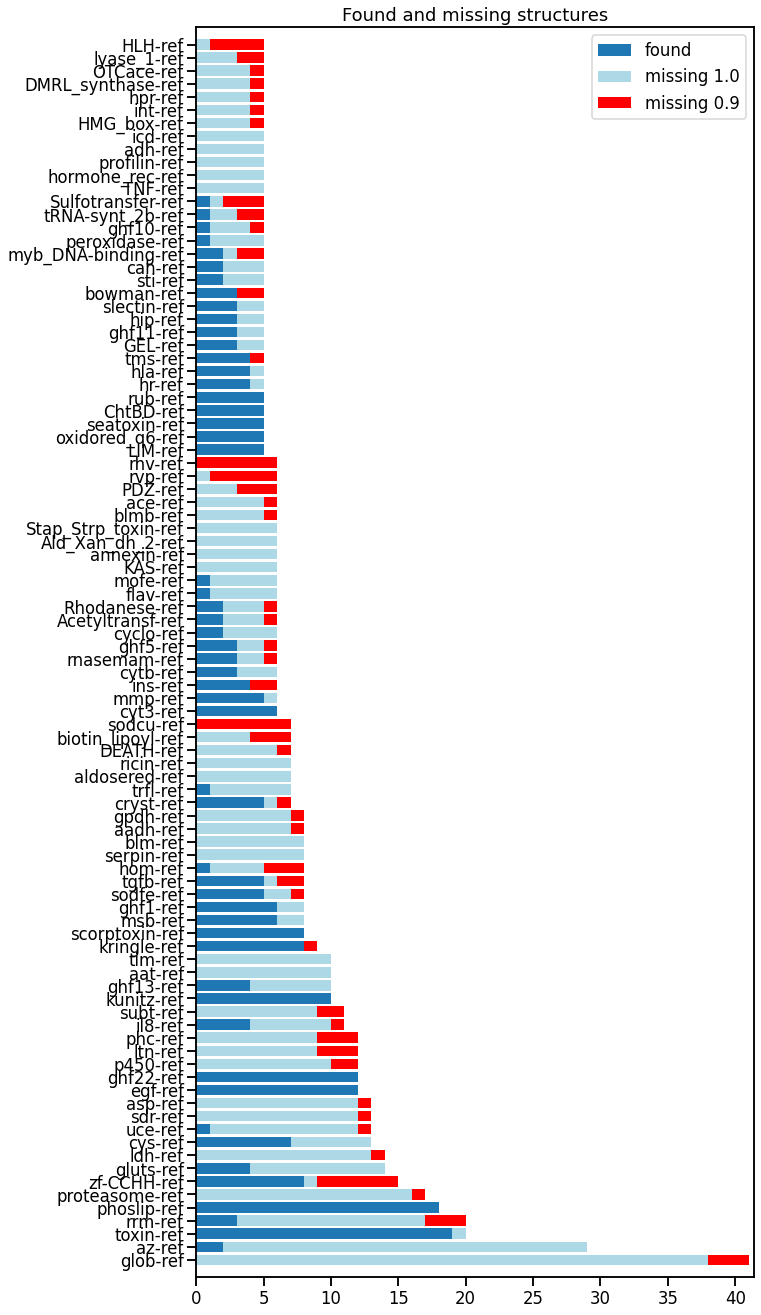

In [272]:
hits = hits.sort_values(by=['n_sequences_ref', "found_1", "found_9"], ascending=False)

plt.figure(figsize=(10, 23))
plt.barh(hits.family, hits.found_1, label = "found")
plt.barh(hits.family, hits["missing_1.0"], left= hits.found_1, label = "missing 1.0", color = "lightblue")
plt.barh(hits.family, hits["missing_0.9"], left= hits.n_sequences_ref - hits["missing_0.9"] , label = "missing 0.9", color = "red")
plt.title("Found and missing structures")
plt.legend(loc = "upper right")
plt.margins(0.01)
plt.show()
